
<img src="http://www.nserc-crsng.gc.ca/_gui/wmms.gif" alt="Canada logo" align="right">

<br>

<img src="http://www.triumf.ca/sites/default/files/styles/gallery_large/public/images/nserc_crsng.gif?itok=H7AhTN_F" alt="NSERC logo" align="right" width = 90>



# Exploring NSERC Awards Data


Canada's [Open Government Portal](http://open.canada.ca/en) includes [NSERC Awards Data](http://open.canada.ca/data/en/dataset/c1b0f627-8c29-427c-ab73-33968ad9176e) from 1995 through 2016.

The awards data (in .csv format) were copied to an [Amazon Web Services S3 bucket](http://docs.aws.amazon.com/AmazonS3/latest/dev/UsingBucket.html). This open Jupyter notebook acts as a generalized template from which to explore this data.

> **Acknowledgement:** I thank [Ian Allison](https://github.com/ianabc) and [James Colliander](http://colliand.com) of the [Pacific Institute for the Mathematical Sciences](http://www.pims.math.ca/) for building the [JupyterHub service](http://syzygy.ca) and for help with this notebook. -- I. Heisz

In [1]:
## Note: this file is meant primarily as a template from which to create other files, 
## loading this much data puts undue stress on the kernel and may cause it to crash.

## Loading the Data

In [2]:
import numpy as np
import pandas as pd

## Bring in a selection of the NSERC awards data starting with 1995 and ending with 2016.
## Throw away as much as you can to keep the DataFrame small enough to manipulate using a laptop.

df = pd.DataFrame()

startYear = 1995
endYear   = 2017  # The last year is not included, so if it was 2016 it means we include the 2016 collection but not 2017.

for year in range(startYear, endYear):
    file = 'https://s3.ca-central-1.amazonaws.com/open-data-ro/NSERC/NSERC_GRT_FYR' + str(year) + '_AWARD.csv.gz'
    df = df.append(pd.read_csv(file, compression='gzip', usecols = [1, 2, 3, 4, 5, 7, 9, 11, 12, 13, 17, 28], encoding='latin-1'))
    
    print(year)
 
## Rename columns for better readability.
df.columns = ['Name', 'Department', 'OrganizationID',
                 'Institution', 'ProvinceEN', 'CountryEN',
                 'FiscalYear', 'AwardAmount', 'ProgramID',
                 'ProgramNameEN', 'Committee', 'ResearchSubjectEN']

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [3]:
## Quantify data stored in memory.
print("DataFrame: {:4.2f} Mb".format(sys.getsizeof(df) / (1024. * 1024)))

DataFrame: 284.23 Mb


## Selecting the Data that You Want to Use

In [4]:
# run this cell again if you want to reset your selections.
selectedData = df

Note: If you want to use an entire column of data rather than selecting for certain slices of it,
then please comment out all of the selection code for that column, found below.

### Committee Selection

In [5]:
## View the Available Committees
availableCommittees = df.drop_duplicates(subset = 'Committee')
sortedCommittees = availableCommittees.sort_values(by=['Committee'], ascending=[True])
print(sortedCommittees.to_string(columns= ['Committee', 'ResearchSubjectEN'], index=False))

## Get the data for the selected committee
committee = 1508 # Enter your committee selection here
selectedData = selectedData.loc[(selectedData['Committee'] == committee)]

Committee                                  ResearchSubjectEN
        2                                           Genetics
        3                           Agricultural engineering
        4                              Polymers and coatings
        6                               Structural materials
        7                           Software and development
        8         Petrology, igneous and metamorphic geology
        9                                    Stable isotopes
       11                                   Electromagnetics
       12                              Biomedical technology
       13                               Offshore engineering
       14                            Nonparametric inference
       16                                      Combinatorics
       17                         Astronomy and astrophysics
       18                                Terrestrial ecology
       19                                      Not available
       20               

### Institution Selection

In [6]:
## View the Available Institutions
availableInstitutions = df.drop_duplicates(subset = 'Institution')
sortedInstitutions = availableInstitutions.sort_values(by=['Institution'], ascending=[True])
print(sortedInstitutions.to_string(columns= ['Institution'], index=False))

## Get the data for the chosen institution
institution = 'University of British Columbia' # Enter your institution selection here
selectedData = selectedData.loc[(selectedData['Institution'] == institution)]

Institution
                                       1-Material
                           123 Certification Inc.
                                 2G Robotics Inc.
                                360pi Corporation
                   364 Northern Development Corp.
                                 3AG Systems Inc.
                                3M Canada Company
                                       4 H Canada
                              4198638 Canada Inc.
                               4483596 Canada Inc
                                     5N Plus Inc.
                            5Touch Solutions Inc.
                       6th Dimension Devices Inc.
                              8518394 Canada Inc.
                            8738602 Canada Centre
                            8769532 Canada Center
                              8996598 Canada Inc.
                          90 Degree Software Inc.
                                  A Lassonde Inc.
                A Thinking Ape Enterta

## Program Selection

In [7]:
## View the Available Programs
availablePrograms = df.drop_duplicates(subset = 'ProgramID')
sortedPrograms = availablePrograms.sort_values(by=['ProgramID'], ascending=[True])
print(sortedPrograms.to_string(columns= ['ProgramID','ProgramNameEN'], index=False))

## Get the data for the chosen program
#programID = 'CUSRA' # Enter your programID selection here (Use the ProgramID, not the ProgramNameEN)
#selectedData = selectedData.loc[(selectedData['ProgramID'] == programID)]

ProgramID                                      ProgramNameEN
  AAFPJ   Agriculture and Agri-Food Canada Research Part...
   AANSE  Aboriginal Ambassadors in the Natural Sciences...
  AANSE   Aboriginal Ambassadors in the Natural Sciences...
   APCPJ  Automotive Partnership Canada Project         ...
  APCPJ   Automotive Partnership Canada Project         ...
   BCPIR  Brockhouse Canada Prize for Interdisciplinary ...
  BCPIR   Brockhouse Canada Prize for Interdisciplinary ...
  BEFTR                      Bilateral Exchange Program (H)
   BFAOR  Belmont Forum Arctic Observing and Research   ...
   BNCEG  Business-led Networks of Centres of Excellence...
  BNCEG   Business-led Networks of Centres of Excellence...
   BNCEL  Business-led Networks of Centres of Excellence...
    BPDF                   Banting Postdoctoral Fellowships
  BPDF                     Banting Postdoctoral Fellowships
   BPDFT  Banting Postdoctoral Fellowships Tri-council  ...
   CAPPJ                             Co

## Researcher Selection

In [8]:
## View the Available Researchers
availableResearchers = df.drop_duplicates(subset = 'Name')
sortedInstitutions = availableInstitutions.sort_values(by=['Name'], ascending=[True])
print(sortedInstitutions.to_string(columns= ['Name'], index=False))

## Get the data for the chosen researcher
#name = 'James Colliander' # Enter your name selection here
#selectedData = selectedData.loc[(selectedData['Name'] == name)]

Name
               Aarssen, Lonnie
                Abbott, Harvey
                Abcarius, John
              Abcarius, Nicole
              AbdElHalim, Omar
                 Abdalla, Hany
               AbdelAziz, Alaa
             AbdelGhani, Ahmed
            AbdelSayed, George
               Abdelbadie, Ali
              Abdelgadir, Duaa
            Abdelrahman, Tarek
              Abdous, Belkacem
              AbdulBaki, Katia
           Abecassis, Maurissa
                   Abid, Lamia
               Abielmona, Rami
               AbouJeyab, Rola
            AbouKhalil, Michel
       AbouNohra, JoumanaSamir
              AbouRabia, Osman
          Abouatallah, Ghassan
                Aboulazm, Azmy
        Aboulhamid, ElMostapha
            Aboulkassim, Mehdi
             Aboulnasr, Tyseer
               Abourahma, Heba
               Abourahma, Heba
                 Abraham, Alan
                Abraham, Bovas
                 Abraham, Ruth
                Abrahams, Mark
   

### A sample of the data selected
If this is empty then try being less selective.

In [9]:
selectedData.head() 

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,Committee,ResearchSubjectEN
5722,"Doebeli, Michael",Zoology,2,University of British Columbia,British Columbia,CANADA,2009,48530,EQPEQ,Research Tools and Instruments - Category 1 (<...,1508,Applied mathematics
140,"Adem, Alejandro",Mathematics,2,University of British Columbia,British Columbia,CANADA,2010,40000,RGPIN,Discovery Grants Program - Individual,1508,Algebraic topology
569,"Angel, Omer",Mathematics,2,University of British Columbia,British Columbia,CANADA,2010,24000,RGPIN,Discovery Grants Program - Individual,1508,Probability theory
7093,"Fraser, Ailana",Mathematics,2,University of British Columbia,British Columbia,CANADA,2010,24000,RGPIN,Discovery Grants Program - Individual,1508,Differential geometry
7203,"Froese, Richard",Mathematics,2,University of British Columbia,British Columbia,CANADA,2010,20000,RGPIN,Discovery Grants Program - Individual,1508,Functional analysis and operator theory


## Plotting

In [10]:
## Imports For Plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
!pip3 install plotly --user #Plotly for interactive graphing
import plotly.plotly as py
import plotly.graph_objs as go

### Plot Settings, Modifiable Variables

In [11]:
data = selectedData

## Change the x and y axis columns to see different graphs.
xAxis = 'FiscalYear'
yAxis = 'AwardAmount'

## y axis scaling
yScalingFactor = 10**3
yScalingFactorString = ' In Thousands'

## Dynamically adjusts y axis range to the maximum numeric value in the y column
yAxisLength = [0,data[yAxis].max()/yScalingFactor] 

## Dynamically adjusts y axis range to be the number of rows in the data
# only use for categorical data, disable y axis scaling if you use this
#yAxisLength = [0,data.shape[0]] 

## x axis scaling
xScalingFactor = 1
xScalingFactorString = ''

## Dynamically adjusts x axis length to the maximum numeric value in the x column
#xAxisLength = [0,data[xAxis].max()/xScalingFactor] 

## Dynamically adjusts x axis length to be the number of rows in the data
# only use for categorical data, disable x axis scaling if you use this
xAxisLength = [0,data.shape[0]] 

plotPointSizes = 3 

# Make the title more suited to what you select
title = 'Graph of NSERC Funding'

### Make the Plot

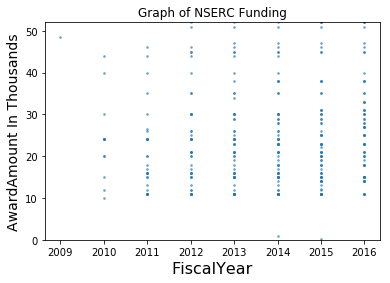

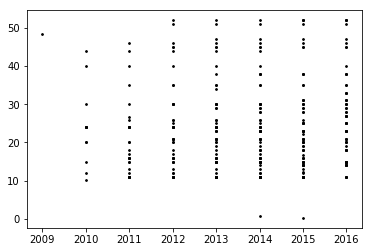

In [12]:
axes = plt.gca() # creates the axes

## x axis
x = data[xAxis]
y = data[yAxis] # scales x

plt.xlabel(xAxis + xScalingFactorString, fontsize=16) # x axis label
axes.set_ylim(xAxisLength) # x axis maximum

## y axis
y = data[yAxis]
y = y/yScalingFactor # scales y

plt.ylabel(yAxis + yScalingFactorString, fontsize=14) # y axis label
axes.set_ylim(yAxisLength) # y axis maximum

## plot title
plt.title(title)

## make the plot
plot = plt.scatter(x,y,s=plotPointSizes,alpha=0.5) # alpha at 0.5 so we can see point overlays

## ***********TO DO: Get this to be a overlay and selected for certain data and make the dots red and alpha=0.5
fig, ax = plt.subplots()
ax.scatter(x,y,s=plotPointSizes,data=data, c = 'k')

## draw the plot
plt.show()

TO DO
Make the second plot layered on top of the first plot, for comparisons.
Make it easy to adjust/customize the input of the second plot.